## **Data Exploration**

### **Data Loading**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
train = pd.read_csv("/Users/neehanthreddym/Desktop/FDS/Project/data/train.csv")
test = pd.read_csv("/Users/neehanthreddym/Desktop/FDS/Project/data/test.csv")

train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [2]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


### **Initial Data Exploration**

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [4]:
# Checking for duplicate rows
print("Number of duplicate rows in train set:", train.duplicated().sum())
print("Number of duplicate rows in test set:", train.duplicated().sum())

Number of duplicate rows in train set: 0
Number of duplicate rows in test set: 0


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,136429.0,68214.000000,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Air temperature [K],136429.0,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,309.941070,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,1520.331110,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,104.408901,63.965040,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0
HDF,136429.0,0.005160,0.071649,0.0,0.0,0.0,0.0,1.0
PWF,136429.0,0.002397,0.048899,0.0,0.0,0.0,0.0,1.0


### **Exploratory Data Analysis**

**What percentage of machines fail, and what percentage don’t?**

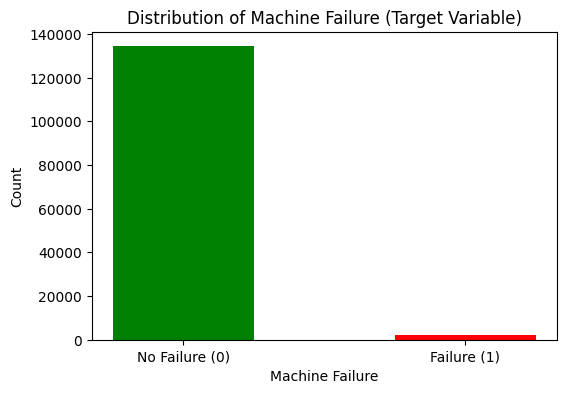

In [6]:
# Distribution of target variable
target_dist = train['Machine failure'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(target_dist.index, target_dist.values, color=['green', 'red'], width=0.5)
plt.title('Distribution of Machine Failure (Target Variable)')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Failure (0)', 'Failure (1)'])
plt.show()

**How do different machine types compare in terms of failure rates?**

In [7]:
train["Type"].unique()

array(['L', 'M', 'H'], dtype=object)

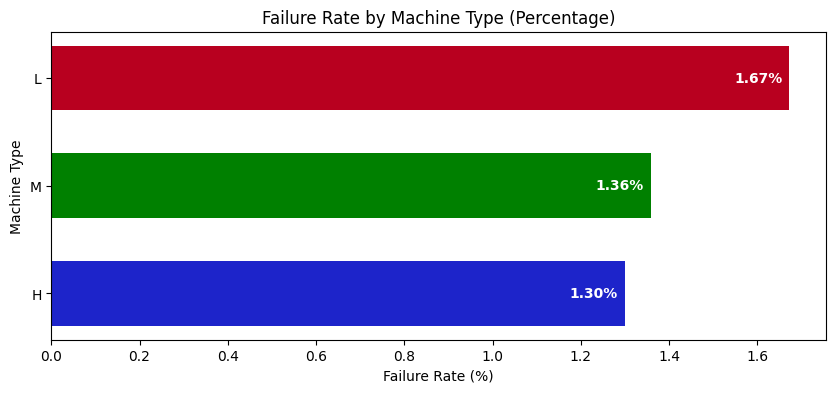

In [8]:
failure_rate_by_type = train.groupby("Type")["Machine failure"].mean()
failure_rate_by_type = pd.DataFrame(failure_rate_by_type).reset_index().sort_values('Machine failure')
percentages = failure_rate_by_type['Machine failure'] * 100

plt.figure(figsize=(10, 4))
bars = plt.barh(failure_rate_by_type['Type'], percentages, color=['#1D24CA', 'green', '#B8001F'], height=0.6)
plt.title("Failure Rate by Machine Type (Percentage)")
plt.xlabel("Failure Rate (%)")
plt.ylabel("Machine Type")

# Add labels
for bar, percentage in zip(bars, percentages):
    label = plt.text(bar.get_width()-0.125, bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', va='center')
    label.set_color('#ffffff')
    label.set_fontweight(weight='bold')

plt.show()

More failure rate is observed for the Machine Type `L`(Low performance) compared to `M`(Medium performance) and `H`(High performance).

**Distribution of Numerical Features**

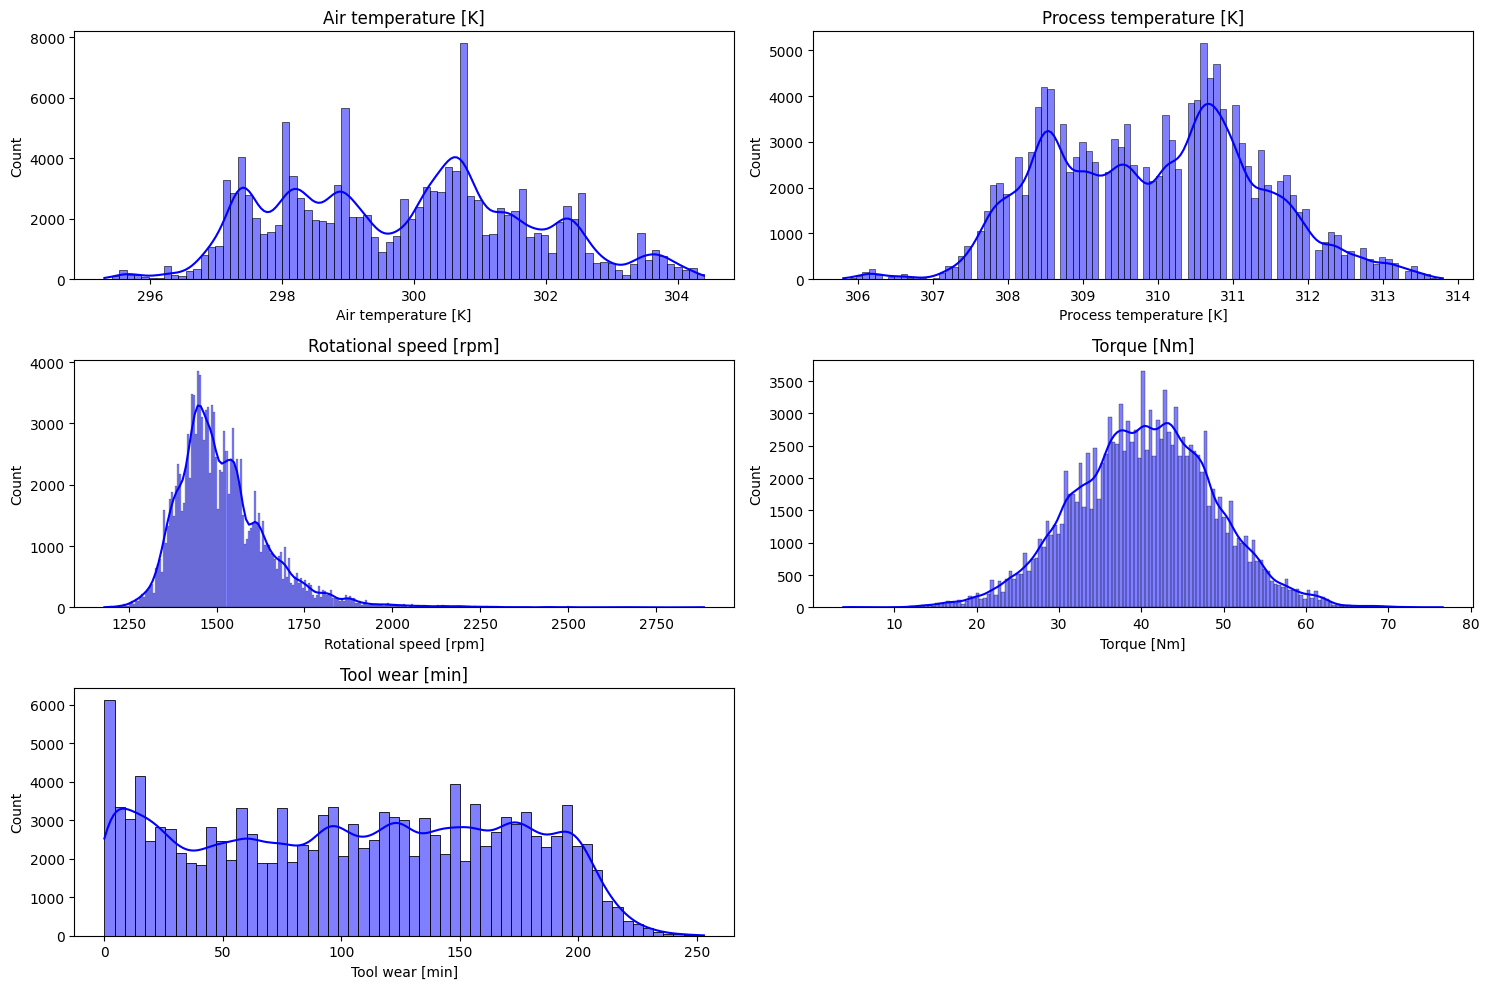

In [9]:
# Plot distribution of numerical features
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(int(len(numerical_cols)/2)+1, 2, i)
    sns.histplot(train[feature], kde=True, color='blue')
    plt.title(feature)
plt.tight_layout()
plt.show()

- **Rotational speed [rpm]** and **Tool wear [min]**: Distribution is highly skewed to the right, with a peak at low values and a tail extending towards higher values.
- **Process temperature [K]**: Distribution is somewhat normal or gaussian but with slight right skew.
- **Torque [Nm]**: Distribution appears to be normal or Gaussian.
- **Air Temperature [K]**: The features shows a bimodal distribution, meaning it has two distinct peaks.

**Checking for outliers**

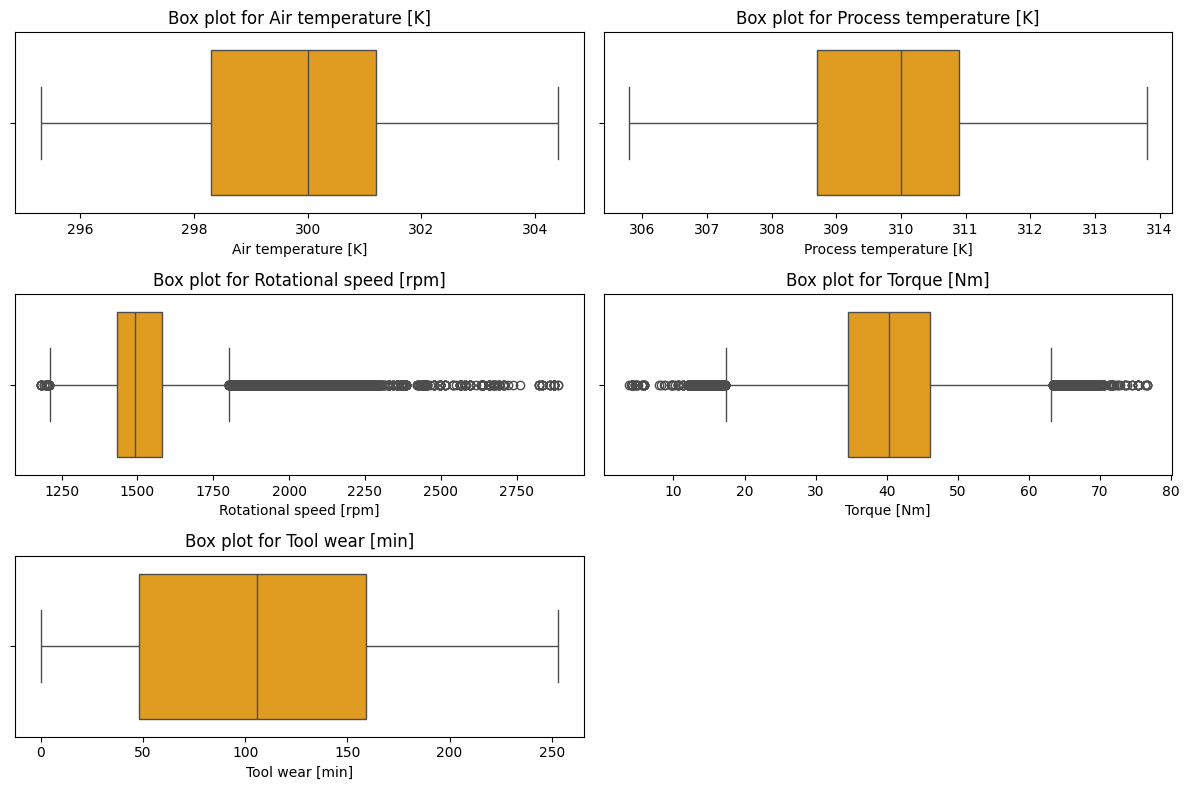

In [10]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(int(len(numerical_cols)/2)+1, 2, i)
    sns.boxplot(x=train[feature], color='orange')
    plt.title(f'Box plot for {feature}')
plt.tight_layout()
plt.show()

Outliers detected: 9193
Train data shape before removing outliers: (136429, 14)
Train data shape after removing outliers: (127236, 14)


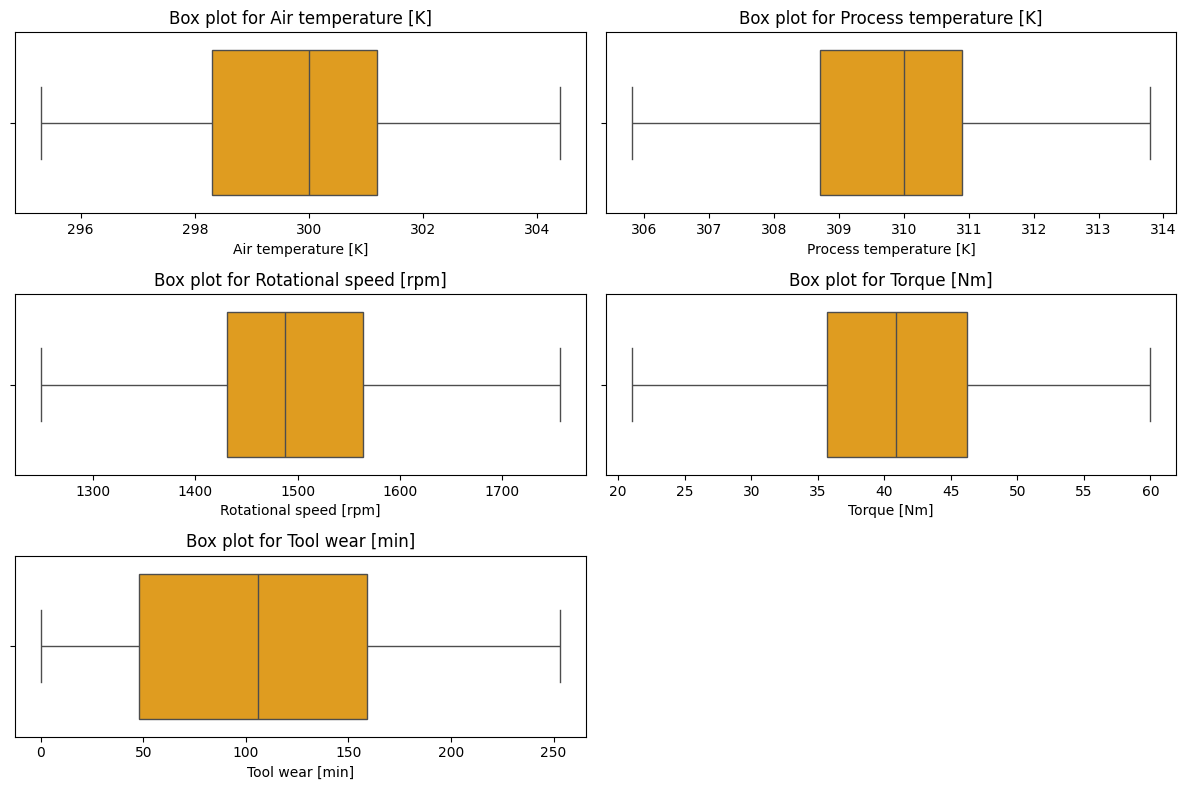

In [14]:
# Handling the outliers using IQR
def detect_outlier_IQR(data, features):

    outlier_idxs = set()

    for feature in features:
        q1 = train[feature].quantile(0.28)
        q3 = train[feature].quantile(0.72)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        
        idx = data[(data[feature]<lower_bound) | (data[feature]>upper_bound)].index
        outlier_idxs.update(idx)
    
    return outlier_idxs

outlier_cols = ['Rotational speed [rpm]', 'Torque [Nm]']

outlier_idx = detect_outlier_IQR(train, outlier_cols)
print(f"Outliers detected: {len(outlier_idx)}")

# Remove outliers
train_no_outliers = train.drop(index=outlier_idx)
print(f"Train data shape before removing outliers: {train.shape}")
print(f"Train data shape after removing outliers: {train_no_outliers.shape}")

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_cols, 1):
    plt.subplot(int(len(numerical_cols)/2)+1, 2, i)
    sns.boxplot(x=train_no_outliers[feature], color='orange')
    plt.title(f'Box plot for {feature}')
plt.tight_layout()
plt.show()

**Which features are most correlated with the target variable?**

In [15]:
# Calculate correlation matrix
num_cols = train_no_outliers.select_dtypes(include=['int64', 'float64'])
correlation_matrix =num_cols.corr()

# Analyze correlation with 'Machine failure'
correlation_with_target = correlation_matrix['Machine failure'].sort_values(ascending=False)
print(correlation_with_target)

Machine failure            1.000000
HDF                        0.611487
OSF                        0.492818
TWF                        0.346378
PWF                        0.202539
Torque [Nm]                0.119524
Air temperature [K]        0.070210
Tool wear [min]            0.055379
Process temperature [K]    0.033435
RNF                        0.003919
id                         0.000437
Rotational speed [rpm]    -0.110739
Name: Machine failure, dtype: float64


- `HDF` (Heat Dissipation Failure): Failure related to the machine's ability to dissipate heat.
- `OSF` (Overstrain Failure): Failures caused by excessive stress or strain on machine components.
- `PWF` (Power Failure): Failures related to the machine's power supply.
- `TWF` (Tool Wear Failure): Failures resulting from excessive wear and tear on tools or cutting implements used in the machine.
- `RNF`: Random failures

`HDF`, `OSF`, `PWF`, `TWF`: These features (likely representing specific failure modes or flags) show a moderate to strong positive correlation with "Machine failure." This means that when these features are present (or increase), the likelihood of machine failure also increases.

`Torque`, `Air temperature [K]`, `Tool wear [min]`, and `Process temperature [K]` have some influence, but it's relatively weak.

`Rotational speed [rpm]` has very small effect on machine failure.

`id` and `RNF` has negligible effect on machine failure.

**Checking for NULL values**

In [16]:
train_nc = train_no_outliers.isna().sum()
test_nc = test.isna().sum()

print(f"NULL count in train data: {len(train_nc[train_nc>0])}")
print(f"NULL count in test data: {len(test_nc[test_nc>0])}")

NULL count in train data: 0
NULL count in test data: 0


# **Feature Engineering & Preprocessing**

`id` and `Product Id` may not be usefull directly, could be dropped

In [17]:
# Dropping the unnecessary columns
train_df = train_no_outliers.drop(columns=['id', 'Product ID'], errors='ignore')
test_df = test.drop(columns=['id', 'Product ID'], errors='ignore')
print(train_df.columns)
print(test_df.columns)

# Encoding the Type column
train_df['Type'] = train_df['Type'].map({'L': 0, 'M': 1, 'H': 3})
train_df

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')
Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
3,0,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,1,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,1,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,0,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,1,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,3,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,0,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,0,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [18]:
test_df['Type'] = test_df['Type'].map({'L': 0, 'M': 1, 'H': 3})
test_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,0,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,0,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,1,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,1,303.4,312.3,1515,41.3,114,0,0,0,0,0


**Train-validation split**

In [21]:
# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train_df.drop(columns='Machine failure')
y = train_df['Machine failure']

print(f"Actual Response: {y.shape}")

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", test_df.shape)

# Scale only the numerical columns
scaler = StandardScaler()

# Fit the scaler on training data only
scaler.fit(X_train[numerical_cols])

# Transform train and validation data
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
test_df_scaled = test_df.copy()

X_train_scaled[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_val_scaled[numerical_cols] = scaler.transform(X_val[numerical_cols])
test_df_scaled[numerical_cols] = scaler.transform(test_df[numerical_cols])

Actual Response: (127236,)
Training set size: (101788, 11)
Validation set size: (25448, 11)
Test set size: (90954, 11)


# **Machine Learning Models for Classification**

### **Baseline model (Logistic Regression)**

Training Data ROC-AUC score: 0.935535
Validation Data ROC-AUC score: 0.930215
Accuracy on training set: 0.996866
Accuracy on validation set: 0.996856


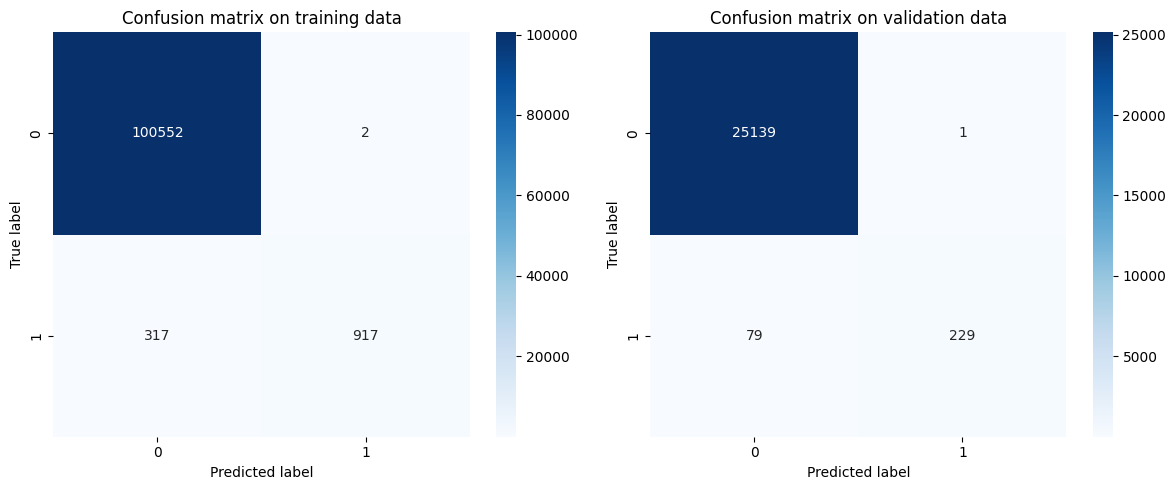

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve

# Initialize and train the model
logistic_clf = LogisticRegression(random_state=99, max_iter=1000)
logistic_clf.fit(X_train, y_train)

# Evaluate the model on Training set
y_pred_train_logistic = logistic_clf.predict(X_train)
y_prob_train_logistic = logistic_clf.predict_proba(X_train)[:, 1]

# Evaluate the model on Validation set
y_pred_val_logistic = logistic_clf.predict(X_val)
y_prob_val_logistic = logistic_clf.predict_proba(X_val)[:, 1]

logistic_train_auc = roc_auc_score(y_train, y_prob_train_logistic)
logistic_val_auc = roc_auc_score(y_val, y_prob_val_logistic)
logistic_train_accuracy = accuracy_score(y_train, y_pred_train_logistic)
logistic_val_accuracy = accuracy_score(y_val, y_pred_val_logistic)

print(f"Training Data ROC-AUC score: {logistic_train_auc:.6f}")
print(f"Validation Data ROC-AUC score: {logistic_val_auc:.6f}")
print(f"Accuracy on training set: {logistic_train_accuracy:.6f}")
print(f"Accuracy on validation set: {logistic_val_accuracy:.6f}")

logistic_train_cm = confusion_matrix(y_train, y_pred_train_logistic, labels=logistic_clf.classes_)
logistic_val_cm = confusion_matrix(y_val, y_pred_val_logistic, labels=logistic_clf.classes_)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.heatmap(logistic_train_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix on training data")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.subplot(1,2,2)
sns.heatmap(logistic_val_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion matrix on validation data")
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.tight_layout()
plt.show()

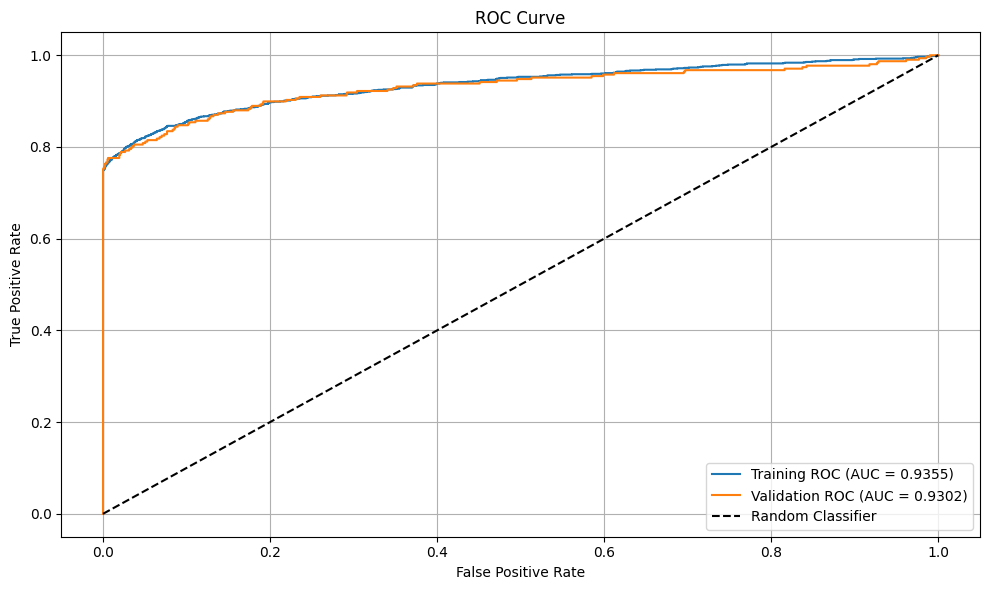

In [23]:
# ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train_logistic)
fpr_val, tpr_val, _ = roc_curve(y_val, y_prob_val_logistic)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {logistic_train_auc:.4f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC (AUC = {logistic_val_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()